In [ ]:
import pandas as pd
import numpy as np

# Set seed
np.random.seed(42)

# Fixed list of 25 students
num_students = 25
roll_numbers = [f"Student_{i+1:03d}" for i in range(num_students)]

# Function to generate synthetic student data
def generate_student_data(roll_numbers, course_name, semester, quiz_count, pa_count,
                           project_max, mid_max, final_max, quiz_weight, pa_weight,
                           project_weight, mid_weight, final_weight):
    data = []
    for roll in roll_numbers:
        quizzes = np.random.uniform(0, 10, quiz_count)
        pas = np.random.uniform(0, 100, pa_count)
        project = np.random.uniform(0, project_max)
        mid = np.random.uniform(0, mid_max)
        final = np.random.uniform(0, final_max)

        quiz_total = quizzes.sum()
        pa_total = pas.sum()

        weighted_score = (
            (quiz_total / (quiz_count * 10)) * quiz_weight +
            (pa_total / (pa_count * 100)) * pa_weight +
            (project / project_max) * project_weight +
            (mid / mid_max) * mid_weight +
            (final / final_max) * final_weight
        ) * 100

        data.append([roll, quiz_total, pa_total, project, mid, final, round(weighted_score, 2), course_name, semester])

    return pd.DataFrame(data, columns=[
        "Roll Number", "Quiz Total", "PA Total", "Project",
        "Mid Exam", "Final Exam", "Weighted Score", "Course", "Semester"
    ])

# Course parameters
courses = [
    ("Advanced ML", "Sem 1", 4, 3, 100, 40, 45, 0.2, 0.1, 0.1, 0.25, 0.35),
    ("Deep Learning", "Sem 1", 4, 3, 100, 50, 60, 0.2, 0.1, 0.1, 0.25, 0.35),
    ("Data Mining", "Sem 1", 2, 2, 15, 55, 60, 0.15, 0.1, 0.15, 0.25, 0.35),
    ("Stats and Maths", "Sem 2", 4, 4, 10, 50, 50, 0.1, 0.1, 0.1, 0.3, 0.4)
]

# Generate and merge
all_dfs = [generate_student_data(roll_numbers, *course) for course in courses]
merged_df = pd.concat(all_dfs, ignore_index=True)

# Output shape and preview
merged_df.shape, merged_df


((100, 9),
     Roll Number  Quiz Total    PA Total    Project   Mid Exam  Final Exam  \
 0   Student_001   26.559069   37.009677  86.617615  24.044600   31.863266   
 1   Student_002   20.352761   66.947172  52.475643  17.277801   13.105311   
 2   Student_003   14.098532  144.091973  51.423444  23.696583    2.090269   
 3   Student_004   17.920061  207.864315   9.767211  27.369321   19.806862   
 4   Student_005   15.609241  123.301334  52.006802  21.868411    8.318450   
 ..          ...         ...         ...        ...        ...         ...   
 95  Student_021   14.074698   50.136242   5.830416  21.071228   44.633586   
 96  Student_022   17.983768  189.191914   5.520472  21.806326   14.723288   
 97  Student_023   27.206403  260.705219   0.224693  13.433868   27.081711   
 98  Student_024   18.656522  195.407898   0.183907  45.714940    5.887554   
 99  Student_025   20.561701  118.404453   9.000186  43.694504   29.870655   
 
     Weighted Score           Course Semester  
 0 

In [ ]:
# Check the structure
merged_df.info()

# Preview the data
merged_df.head()

# Check for missing values
merged_df.isnull().sum()

# Unique students and courses
print("Unique students:", merged_df['Roll Number'].nunique())
print("Courses:", merged_df['Course'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Roll Number     100 non-null    object 
 1   Quiz Total      100 non-null    float64
 2   PA Total        100 non-null    float64
 3   Project         100 non-null    float64
 4   Mid Exam        100 non-null    float64
 5   Final Exam      100 non-null    float64
 6   Weighted Score  100 non-null    float64
 7   Course          100 non-null    object 
 8   Semester        100 non-null    object 
dtypes: float64(6), object(3)
memory usage: 7.2+ KB
Unique students: 25
Courses: ['Advanced ML' 'Deep Learning' 'Data Mining' 'Stats and Maths']


In [ ]:
student_course_counts = merged_df.groupby("Roll Number")["Course"].count().sort_values(ascending=False)
print(student_course_counts)


Roll Number
Student_001    4
Student_002    4
Student_003    4
Student_004    4
Student_005    4
Student_006    4
Student_007    4
Student_008    4
Student_009    4
Student_010    4
Student_011    4
Student_012    4
Student_013    4
Student_014    4
Student_015    4
Student_016    4
Student_017    4
Student_018    4
Student_019    4
Student_020    4
Student_021    4
Student_022    4
Student_023    4
Student_024    4
Student_025    4
Name: Course, dtype: int64


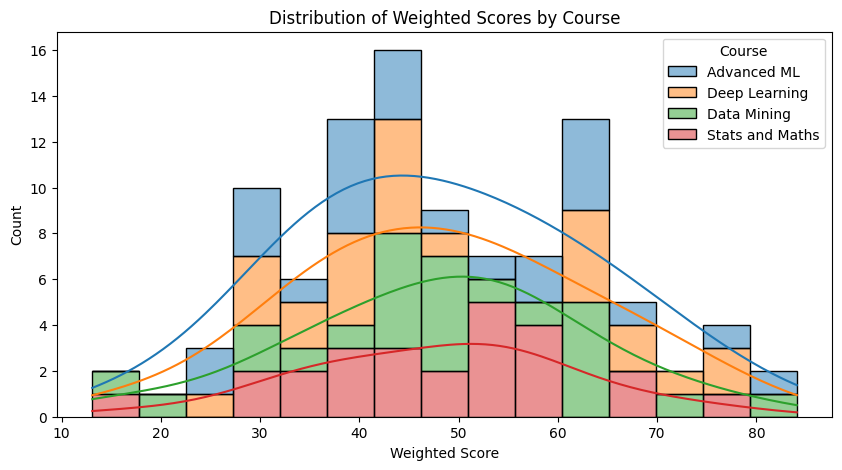

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Weighted Scores
plt.figure(figsize=(10,5))
sns.histplot(data=merged_df, x="Weighted Score", bins=15, kde=True, hue="Course", multiple="stack")
plt.title("Distribution of Weighted Scores by Course")
plt.show()


In [ ]:
course_summary = merged_df.groupby("Course").describe().T
print(course_summary)

Course                Advanced ML  Data Mining  Deep Learning  Stats and Maths
Quiz Total     count    25.000000    25.000000      25.000000        25.000000
               mean     20.371303     9.241407      20.038760        19.730031
               std       5.450042     5.032710       5.493981         4.445407
               min      10.969994     0.715856       8.964496        11.974444
               25%      17.821754     5.592398      16.238431        17.983768
               50%      20.123564     9.003435      20.353278        18.987168
               75%      21.887908    12.976425      23.213169        21.671032
               max      35.790437    17.944131      33.997874        31.164017
PA Total       count    25.000000    25.000000      25.000000        25.000000
               mean    142.563951    95.602312     159.577746       195.436085
               std      46.809772    45.621910      54.494507        62.958630
               min      37.009677    20.474305      

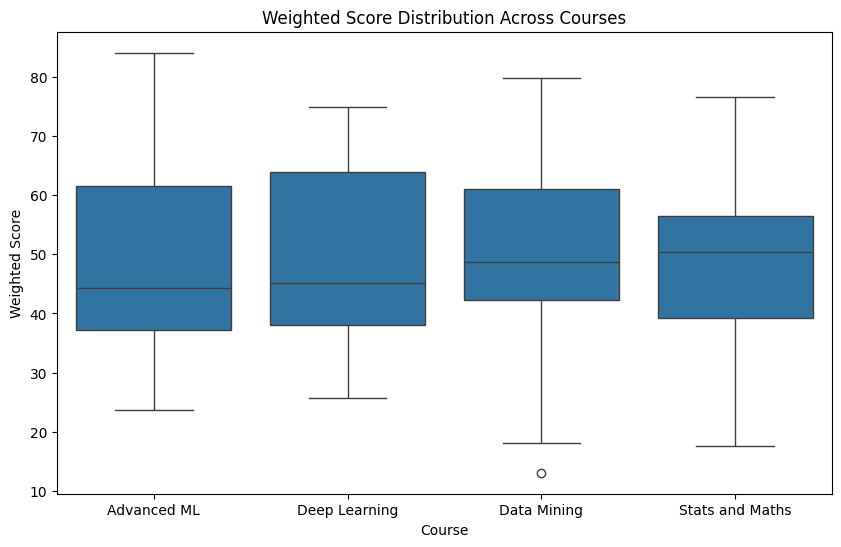

In [ ]:
# Boxplot to compare scores across courses
plt.figure(figsize=(10,6))
sns.boxplot(x="Course", y="Weighted Score", data=merged_df)
plt.title("Weighted Score Distribution Across Courses")
plt.show()

In [ ]:
pivot_df = merged_df.pivot(index="Roll Number", columns="Course", values="Weighted Score")
print(pivot_df)

Course       Advanced ML  Data Mining  Deep Learning  Stats and Maths
Roll Number                                                          
Student_001        62.99        61.09          39.39            68.27
Student_002        38.65        79.89          45.32            39.28
Student_003        33.43        45.84          74.94            57.80
Student_004        49.38        45.50          45.36            53.36
Student_005        37.25        71.72          31.70            31.08
Student_006        37.73        63.95          48.79            45.74
Student_007        56.87        48.34          28.40            58.64
Student_008        30.07        61.17          43.79            32.64
Student_009        59.04        28.76          31.68            38.83
Student_010        25.42        49.00          45.08            31.39
Student_011        28.65        56.65          62.88            52.91
Student_012        61.70        52.75          34.18            76.61
Student_013        4

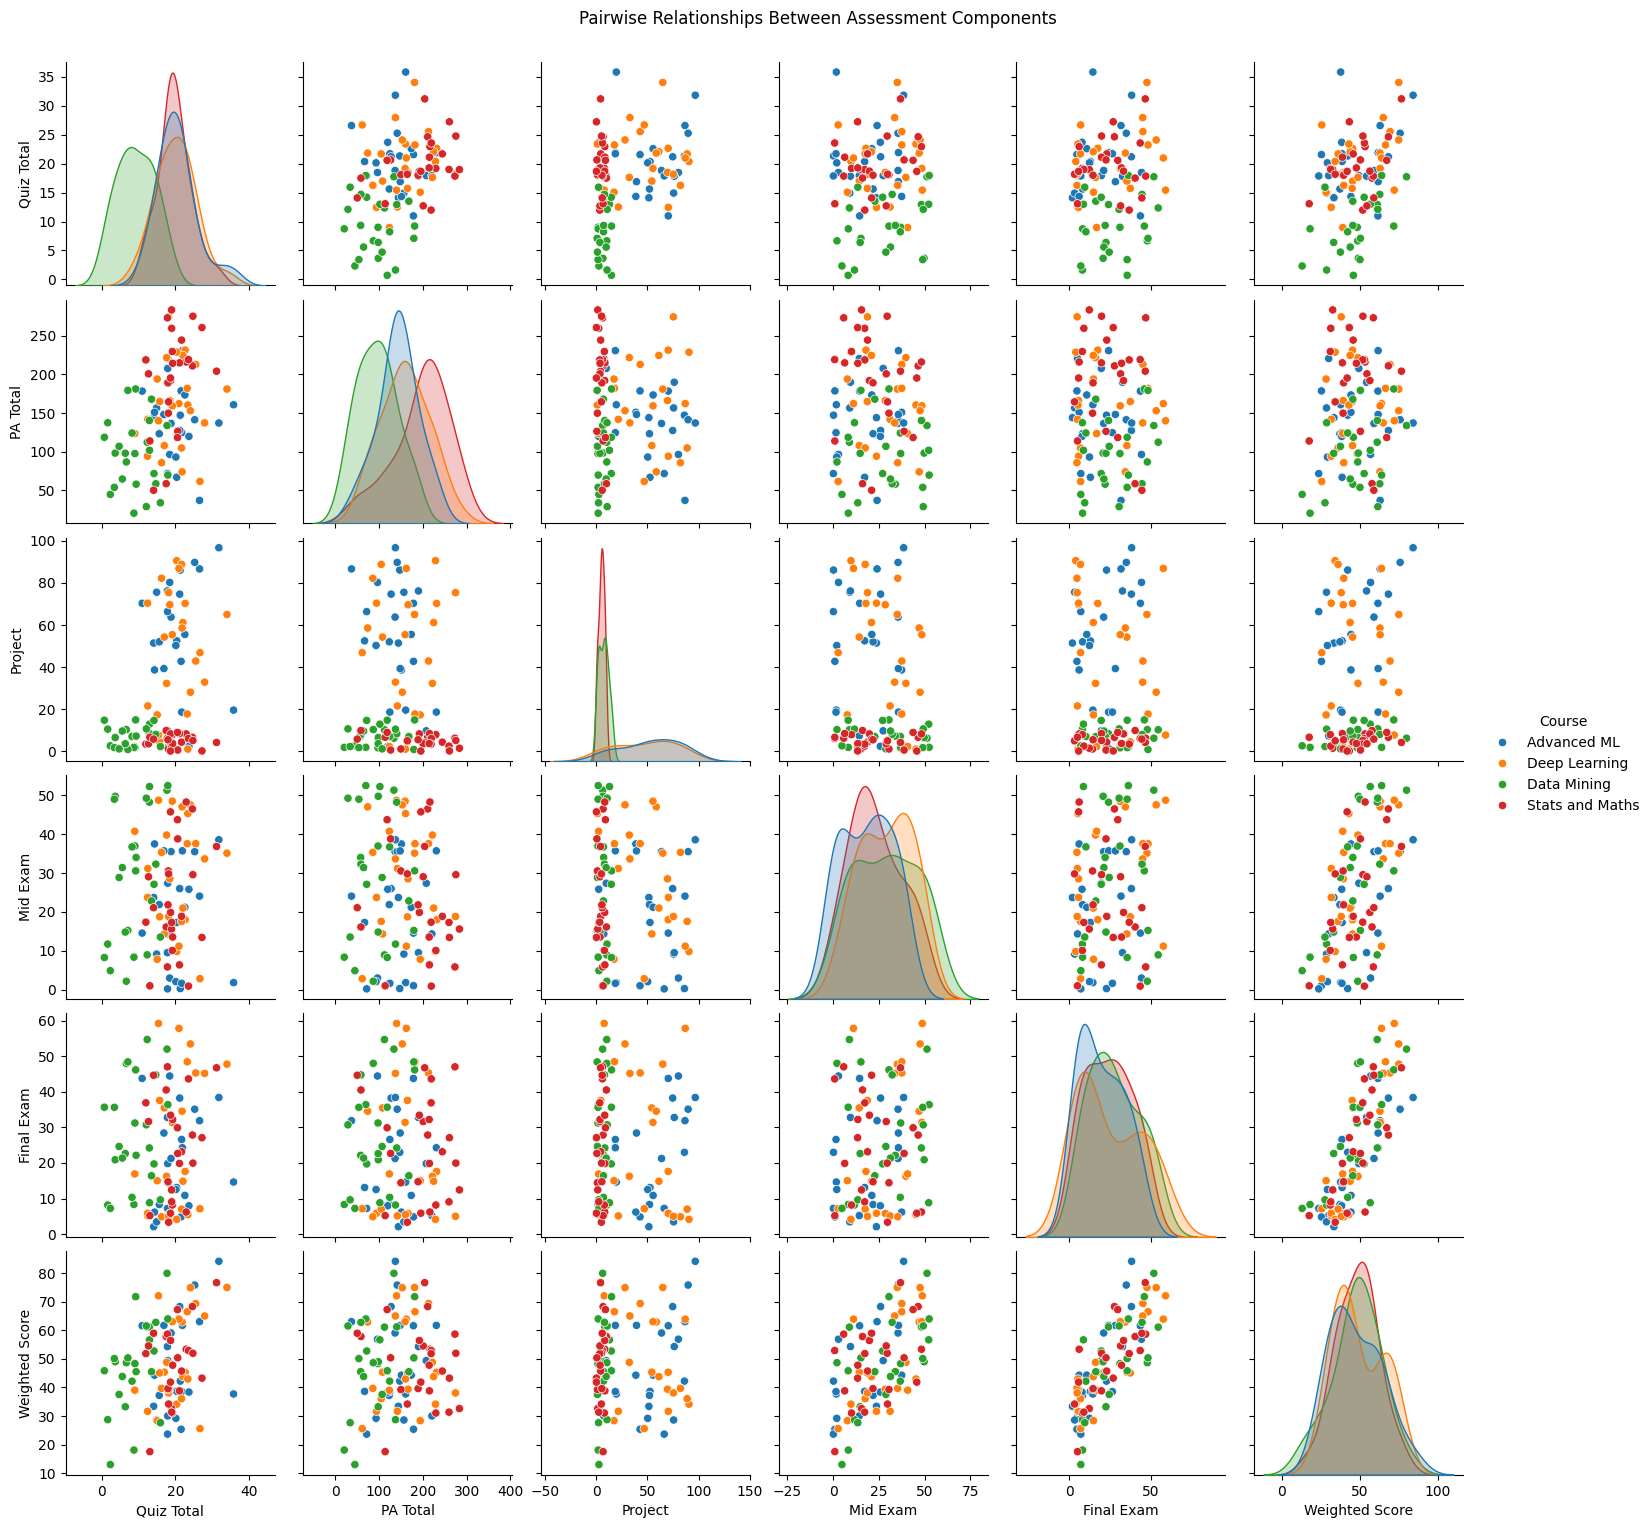

In [ ]:
sns.pairplot(merged_df, hue="Course", vars=["Quiz Total", "PA Total", "Project", "Mid Exam", "Final Exam", "Weighted Score"])
plt.suptitle("Pairwise Relationships Between Assessment Components", y=1.02)
plt.show()

In [ ]:
# Top students per course
top_students = merged_df.groupby("Course").apply(lambda x: x.nlargest(3, "Weighted Score"))

top_students

/tmp/ipython-input-9-2915581495.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_students = merged_df.groupby("Course").apply(lambda x: x.nlargest(3, "Weighted Score"))


Roll Number  Quiz Total    PA Total    Project   Mid Exam  \
Course                                                                          
Advanced ML     24  Student_025   31.794103  137.195933  96.665482  38.544799   
                19  Student_020   25.238380  141.419504  89.711026  35.483457   
                21  Student_022   21.168596  127.482801  74.649141  25.985316   
Data Mining     51  Student_002   17.723372  133.913470   6.273646  51.300067   
                54  Student_005    9.210979  181.261868  14.949553  30.548744   
                55  Student_006   17.944131   69.789224   1.937391  52.472806   
Deep Learning   27  Student_003   33.997874  181.115387  64.996393  35.098344   
                48  Student_024   24.072465  153.091870  28.096319  47.520574   
                49  Student_025   15.412917  140.070674   7.773464  48.719740   
Stats and Maths 86  Student_012   31.164017  204.278108   4.241307  36.822212   
                75  Student_001   24.617436  211.136961   6.686432  46.468799   
                99  Student_025   20.561701  118.404453   9.000186  43.694504   

                    Final Exam  Weighted Score           Course Semester  
Course                                                                    
Advanced ML     24   38.385425           84.08      Advanced ML    Sem 1  
                19   35.094400           75.78      Advanced ML    Sem 1  
                21   38.215053           68.26      Advanced ML    Sem 1  
Data Mining     51   51.963833           79.89      Data Mining    Sem 1  
                54   46.139245           71.72      Data Mining    Sem 1  
                55   36.370478           63.95      Data Mining    Sem 1  
Deep Learning   27   47.747560           74.94    Deep Learning    Sem 1  
                48   53.415827           74.87    Deep Learning    Sem 1  
                49   59.172645           72.03    Deep Learning    Sem 1  
Stats and Maths 86   46.718351           76.61  Stats and Maths    Sem 2  
                75   27.838145           68.27  Stats and Maths    Sem 2  
                99   29.870655           67.21  Stats and Maths    Sem 2

In [ ]:
# Average score per student across all courses
average_scores = merged_df.groupby("Roll Number")["Weighted Score"].mean().sort_values(ascending=False)

average_scores

,Weighted Score
Roll Number,
Student_025,65.2225
Student_022,58.6275
Student_001,57.9350
Student_012,56.3100
Student_014,55.5175
Student_003,53.0025
Student_023,52.9500
Student_017,51.0675
Student_020,50.8925


In [ ]:
# Pivot again to see who missed what
pivot_df = merged_df.pivot(index="Roll Number", columns="Course", values="Weighted Score")
missing_courses = pivot_df.isnull().sum()
print("Missing courses count:")
print(missing_courses)

Missing courses count:
Course
Advanced ML        0
Data Mining        0
Deep Learning      0
Stats and Maths    0
dtype: int64


In [ ]:
import plotly.express as px

fig = px.histogram(
    merged_df,
    x="Weighted Score",
    color="Course",
    barmode="overlay",
    nbins=20,
    title="Distribution of Weighted Scores by Course"
)
fig.show()

In [ ]:
fig = px.box(
    merged_df,
    x="Course",
    y="Weighted Score",
    color="Course",
    title="Weighted Score Comparison Across Courses"
)
fig.show()

In [ ]:
fig = px.scatter(
    merged_df,
    x="Project",
    y="Weighted Score",
    color="Course",
    hover_data=["Roll Number"],
    title="Project Marks vs Weighted Score"
)
fig.show()

In [ ]:
student_course_counts = merged_df.groupby("Roll Number")["Course"].nunique().reset_index(name="Courses Taken")

fig = px.bar(
    student_course_counts,
    x="Roll Number",
    y="Courses Taken",
    title="Number of Courses Taken per Student"
)
fig.show()


In [ ]:
# Pivot to show student-course matrix
pivot_df = merged_df.pivot(index="Roll Number", columns="Course", values="Weighted Score")

fig = px.imshow(
    pivot_df,
    labels=dict(x="Course", y="Roll Number", color="Weighted Score"),
    title="Weighted Score Heatmap by Student and Course"
)
fig.show()

In [ ]:
fig = px.parallel_coordinates(
    merged_df,
    dimensions=["Quiz Total", "PA Total", "Project", "Mid Exam", "Final Exam", "Weighted Score"],
    color="Weighted Score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Parallel Coordinates Plot of Assessment Components"
)
fig.show()

In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

# Create the profile report
profile = ProfileReport(merged_df, title="Student Performance EDA Report", explorative=True)


# OR display inline in Jupyter Notebook
profile.to_notebook_iframe()

# Save it to an HTML file
profile.to_file("student_eda_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a80a88710a4a175a57afcdfdea1a7f5dab47c26f83f9019f19c7225a98bc20b2
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 82.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pivot_df = merged_df.pivot(index="Roll Number", columns="Course", values="Weighted Score")

# Create and save profile
profile_pivot = ProfileReport(pivot_df, title="Per-Student Course Comparison Report", explorative=True)
profile_pivot.to_file("student_course_comparison_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 661.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
merged_df.groupby("Roll Number")["Course"].count().sort_values(ascending=False)

student_avg = merged_df.groupby("Roll Number")["Weighted Score"].mean().sort_values(ascending=False)

student_avg

,Weighted Score
Roll Number,
Student_025,65.2225
Student_022,58.6275
Student_001,57.9350
Student_012,56.3100
Student_014,55.5175
Student_003,53.0025
Student_023,52.9500
Student_017,51.0675
Student_020,50.8925


In [ ]:
sem_pivot = merged_df.pivot_table(index="Roll Number", columns="Semester", values="Weighted Score", aggfunc="mean")
sem_pivot["Change"] = sem_pivot["Sem 2"] - sem_pivot["Sem 1"]
print(sem_pivot.sort_values("Change", ascending=False))


Semester         Sem 1  Sem 2     Change
Roll Number                             
Student_012  49.543333  76.61  27.066667
Student_021  33.146667  58.95  25.803333
Student_013  33.146667  51.96  18.813333
Student_015  37.213333  54.53  17.316667
Student_007  44.536667  58.64  14.103333
Student_001  54.490000  68.27  13.780000
Student_020  49.050000  56.42   7.370000
Student_004  46.746667  53.36   6.613333
Student_003  51.403333  57.80   6.396667
Student_018  41.970000  47.79   5.820000
Student_011  49.393333  52.91   3.516667
Student_025  64.560000  67.21   2.650000
Student_017  51.300000  50.37  -0.930000
Student_009  39.826667  38.83  -0.996667
Student_006  50.156667  45.74  -4.416667
Student_014  56.743333  51.84  -4.903333
Student_024  46.993333  41.87  -5.123333
Student_010  39.833333  31.39  -8.443333
Student_008  45.010000  32.64 -12.370000
Student_023  56.176667  43.27 -12.906667
Student_016  48.640000  34.22 -14.420000
Student_002  54.620000  39.28 -15.340000
Student_005  46.

In [ ]:
course_summary = merged_df.groupby(["Semester", "Course"])["Weighted Score"].describe()
course_summary

count     mean        std    min    25%    50%  \
Semester Course                                                            
Sem 1    Advanced ML       25.0  47.5052  16.348210  23.71  37.25  44.30   
         Data Mining       25.0  47.9760  15.777436  13.08  42.21  48.66   
         Deep Learning     25.0  49.1028  15.696934  25.63  38.10  45.08   
Sem 2    Stats and Maths   25.0  48.0872  13.444633  17.59  39.28  50.37   

                            75%    max  
Semester Course                         
Sem 1    Advanced ML      61.57  84.08  
         Data Mining      61.09  79.89  
         Deep Learning    63.88  74.94  
Sem 2    Stats and Maths  56.42  76.61

In [ ]:
avg_scores_by_course = merged_df.groupby("Course")["Weighted Score"].mean().sort_values(ascending=False)
avg_scores_by_course

,Weighted Score
Course,
Deep Learning,49.1028
Stats and Maths,48.0872
Data Mining,47.9760
Advanced ML,47.5052


In [ ]:
avg_Weighted_Score_per_Semester = merged_df.groupby("Semester")["Weighted Score"].mean()
avg_Weighted_Score_per_Semester

,Weighted Score
Semester,
Sem 1,48.194667
Sem 2,48.087200


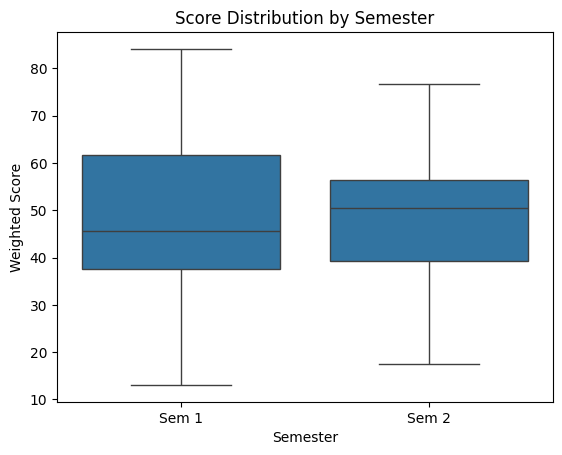

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Semester", y="Weighted Score", data=merged_df)
plt.title("Score Distribution by Semester")
plt.show()

In [ ]:
high_scorers = merged_df[merged_df["Weighted Score"] >= 80]["Roll Number"].value_counts()
high_scorers

,count
Roll Number,
Student_025,1


In [ ]:
top_per_course = merged_df.groupby("Course").apply(lambda x: x.loc[x["Weighted Score"].idxmax()])
top_per_course

/tmp/ipython-input-27-305235112.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Roll Number,Quiz Total,PA Total,Project,Mid Exam,Final Exam,Weighted Score,Course,Semester
Course,,,,,,,,,
Advanced ML,Student_025,31.794103,137.195933,96.665482,38.544799,38.385425,84.08,Advanced ML,Sem 1
Data Mining,Student_002,17.723372,133.913470,6.273646,51.300067,51.963833,79.89,Data Mining,Sem 1
Deep Learning,Student_003,33.997874,181.115387,64.996393,35.098344,47.747560,74.94,Deep Learning,Sem 1
Stats and Maths,Student_012,31.164017,204.278108,4.241307,36.822212,46.718351,76.61,Stats and Maths,Sem 2


In [ ]:
pivot_course_matrix = merged_df.pivot(index="Roll Number", columns="Course", values="Weighted Score")
missing_participation = pivot_course_matrix.isnull().sum()
missing_participation

,0
Course,
Advanced ML,0
Data Mining,0
Deep Learning,0
Stats and Maths,0


In [ ]:
semester_count = merged_df.groupby("Roll Number")["Semester"].nunique()
one_semester_students = semester_count[semester_count == 1]
one_semester_students

,Semester
Roll Number,


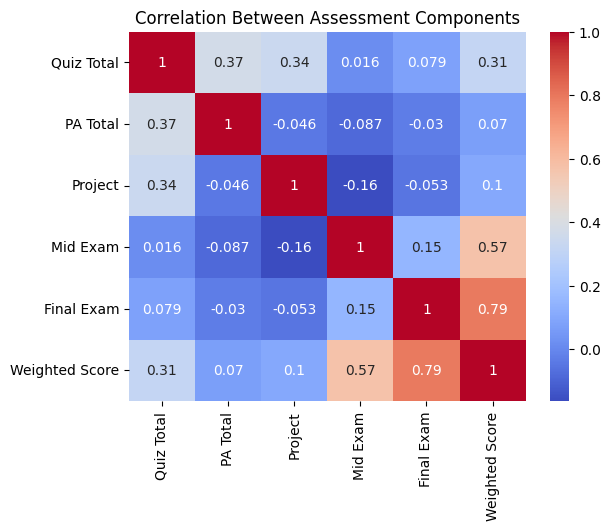

In [ ]:
correlation = merged_df[["Quiz Total", "PA Total", "Project", "Mid Exam", "Final Exam", "Weighted Score"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Assessment Components")
plt.show()

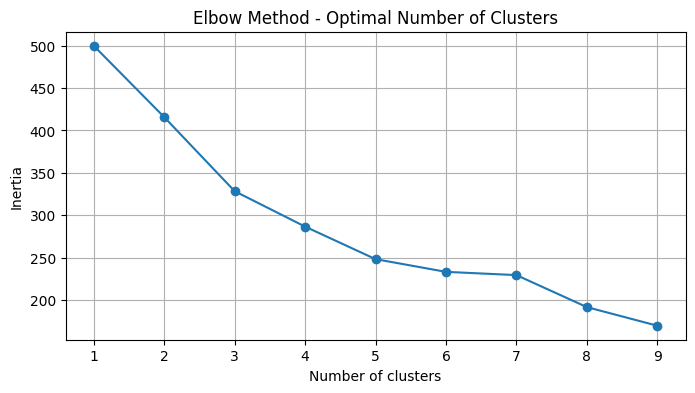

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Use your updated_merged_df from previous steps
# Step 1: Select relevant columns for clustering
features = ["Quiz Total", "PA Total", "Project", "Mid Exam", "Final Exam"]

# Drop rows with any missing values in these columns
cluster_df = merged_df.dropna(subset=features)

# Step 2: Normalize the feature values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df[features])

# Step 3: Determine optimal number of clusters (Elbow method)
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [ ]:
# Apply clustering with chosen K
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_df["Cluster"] = kmeans.fit_predict(scaled_features)

# View few samples
print(cluster_df[["Roll Number", "Course", "Semester", "Cluster", "Weighted Score"]])



    Roll Number           Course Semester  Cluster  Weighted Score
0   Student_001      Advanced ML    Sem 1        1           62.99
1   Student_002      Advanced ML    Sem 1        1           38.65
2   Student_003      Advanced ML    Sem 1        2           33.43
3   Student_004      Advanced ML    Sem 1        2           49.38
4   Student_005      Advanced ML    Sem 1        2           37.25
..          ...              ...      ...      ...             ...
95  Student_021  Stats and Maths    Sem 2        0           58.95
96  Student_022  Stats and Maths    Sem 2        2           39.61
97  Student_023  Stats and Maths    Sem 2        2           43.27
98  Student_024  Stats and Maths    Sem 2        2           41.87
99  Student_025  Stats and Maths    Sem 2        0           67.21

[100 rows x 5 columns]


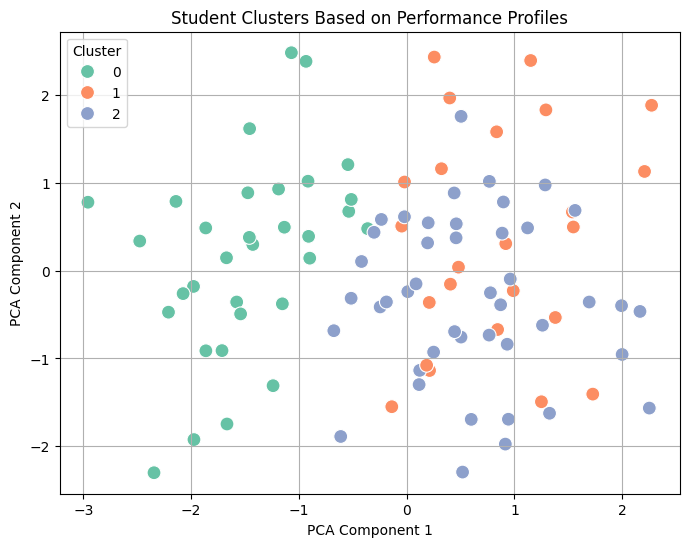

,Quiz Total,PA Total,Project,Mid Exam,Final Exam,Weighted Score
Cluster,,,,,,
0,10.72,100.16,6.70,29.84,29.83,49.97
1,21.85,136.10,62.63,27.73,33.91,59.80
2,19.70,189.96,24.86,19.57,14.94,40.51


In [ ]:
# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)
cluster_df["PCA1"] = reduced[:, 0]
cluster_df["PCA2"] = reduced[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=cluster_df, palette="Set2", s=100)
plt.title("Student Clusters Based on Performance Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Cluster-wise average profile
cluster_profiles = cluster_df.groupby("Cluster")[features + ["Weighted Score"]].mean().round(2)
cluster_profiles